## Hurricanes

Dataset for global hurricanes, North Atlantic: 'ibtracs.NA.list.v04r00.csv' from:
https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/

Read (glance briefly at) the documentation:
https://www.ncdc.noaa.gov/ibtracs/pdf/IBTrACS_v04_column_documentation.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/bendixon/Documents/GitHub/climate/ibtracs.NA.list.v04r00.csv',dtype=object)
# added this dtype as otherwise it was showing an error for mixed dtype
df = df.iloc[1:,:]
df.shape
df.head(3)

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
1,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 12:00:00,TS,26.1000,-90.4000,...,,,,,,,,,6,291
2,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 15:00:00,TS,26.2001,-90.6999,...,,,,,,,,,6,290
3,1851175N26270,1851,5,NaN,GM,NOT_NAMED,1851-06-23 18:00:00,TS,26.3000,-91.0000,...,,,,,,,,,6,290


In [3]:
df.describe()

,SID,SEASON,NUMBER,BASIN,SUBBASIN,NAME,ISO_TIME,NATURE,LAT,LON,...,BOM_GUST_PER,REUNION_GUST,REUNION_GUST_PER,USA_SEAHGT,USA_SEARAD_NE,USA_SEARAD_SE,USA_SEARAD_SW,USA_SEARAD_NW,STORM_SPEED,STORM_DIR
count,122369,122369,122369,542,29260,122369,122369,122369,122369,122369,...,122369,122369,122369,122369,122369,122369,122369,122369,122369,122369
unique,2266,170,137,2,4,294,89296,6,39834,51525,...,1,1,1,2,178,173,160,170,81,362
top,1899215N12329,1887,43,EP,CS,NOT_NAMED,2020-09-16 21:00:00,TS,14.0000,-73.5000,...,,,,,,,,,10,270
freq,264,1907,2172,524,15279,72416,7,104029,363,214,...,122369,122369,122369,116073,116309,116915,117753,117079,8958,3128


In [4]:
# Get the storm ID and the year
sid = df.loc[:,'SID']
season = df.loc[:,'SEASON']
# put it together in one string
sid_season = sid + season
# get the unique values from that 
uniques = sid_season.unique()
# then get the last four characters from that, in order to get the year
uniques = pd.DataFrame(uniques,dtype=str)
ylist = uniques[0].str[-4:]
ylist = np.array(ylist,dtype=int)

Text(0.5, 1.0, 'Histogram of storms 1850-2020')

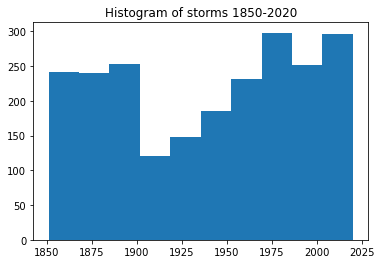

In [19]:
import matplotlib.pyplot as plt
# create plot
fig1 = plt.figure()
# add figure
ax = fig1.add_subplot(111)
ax.hist(ylist)
ax.set_title('Histogram of storms 1850-2020')

In [13]:
ylist = ylist.tolist()

In [17]:
counts_by_year = []
for i in range(1850,2025):
    counts = ylist.count(i)
    counts_by_year.append(counts)
print(counts_by_year)

[0, 15, 12, 19, 12, 11, 12, 13, 13, 15, 16, 18, 13, 14, 12, 14, 13, 19, 9, 14, 20, 17, 10, 10, 12, 9, 15, 13, 25, 17, 19, 20, 12, 10, 8, 13, 15, 35, 18, 17, 7, 19, 15, 20, 11, 15, 11, 9, 18, 10, 7, 13, 5, 10, 6, 5, 11, 5, 10, 12, 5, 6, 7, 6, 1, 6, 15, 4, 6, 5, 5, 7, 5, 9, 11, 4, 11, 8, 6, 5, 3, 13, 15, 20, 13, 8, 17, 11, 9, 6, 9, 6, 11, 10, 14, 11, 7, 10, 10, 16, 16, 12, 11, 14, 16, 13, 12, 8, 12, 14, 8, 13, 7, 10, 13, 10, 11, 26, 15, 30, 19, 22, 19, 17, 20, 23, 21, 15, 24, 20, 18, 22, 8, 6, 20, 14, 10, 14, 19, 15, 16, 12, 10, 10, 12, 21, 13, 9, 14, 16, 19, 17, 14, 21, 16, 31, 10, 17, 17, 11, 21, 20, 19, 16, 9, 12, 16, 19, 16, 20, 26, 0, 0, 0, 0]


[Text(0.5, 1.0, 'Count of storms by year')]

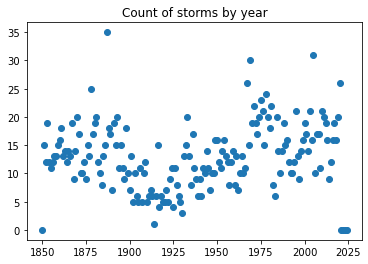

In [21]:
# create plot
fig2 = plt.figure()
# add figure
ax2 = fig2.add_subplot(111)
ax2.scatter(range(1850,2025),counts_by_year)
ax2.set(Title='Count of storms by year')

In [6]:
# Useful things to look at: max wind speed
# col - USA_WIND

In [37]:
# after 1900
s = np.array(df['SEASON'],dtype=int)
w = np.array(df['USA_WIND']) # problem in that lots of old data doesn't have windspeed
wn = w[ w != ' '] # using Boolean to only get the values where there is data
s = s[ w != ' ']

In [38]:
s = np.array(s,dtype=int)
wn = np.array(wn,dtype=int)

In [42]:
print(wn.shape) # checking the same rough size
print(s.shape)

(101858,)
(101858,)


[Text(0, 0.5, 'windspeed in mph'), Text(0.5, 1.0, 'Windspeed by year')]

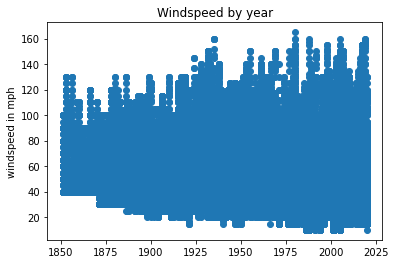

In [43]:
# lots of values, maybe there are multiple recordings for each storm
# this data set has 100K observations, but unique for numbers of storms is 2K
fig2 = plt.figure()
ax1 = fig2.add_subplot(111)
ax1.scatter(s,wn)
ax1.set(title='Windspeed by year', ylabel='windspeed in mph')

In [60]:
years = np.array(df['SEASON'].unique(),dtype=str)

In [62]:
len(df[df['SEASON'] == '1900'])

596

In [79]:
df = df[df['USA_WIND'] != ' '] # get rid of the zero values
windt = []
for i in years:
    sub = df[df['SEASON'] == i]
    wind = np.array(sub['USA_WIND'],dtype=int)
    windm = wind.mean()
    windt.append(windm)
windt = np.array(windt,dtype=float)

In [80]:
ys = np.array(years,dtype=int)

[Text(0, 0.5, 'Avg speed in mph'),
 Text(0.5, 1.0, 'Average wind speed per year, over all storms in year')]

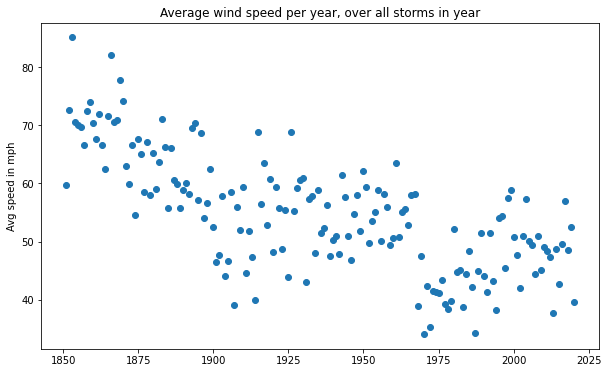

In [111]:
import matplotlib as mpl
fig3 = plt.figure(figsize=(10,6)) # increasing size of figure
ax3 = fig3.add_subplot(111)
ax3.scatter(ys,windt)
ax3.set(title='Average wind speed per year, over all storms in year', ylabel='Avg speed in mph')
# Interesting that this trends down over time! Maybe the arrays are backwards

In [110]:
# What about average speed per storm type?
# Storm type is given by column NATURE
ids = np.array(df['SID'])
df = df[ df['USA_WIND'] != ' '] # removing the blank values
windt2 = []
for i in ids:
    sub = df[ df['SID'] == i]
    wind = np.array(sub['USA_WIND'],dtype=int)
    windm = wind.mean()
    windt2.append(windm)
windt2 = np.array(windt2,dtype=int)
print(windt2)

[59 59 59 ... 32 32 32]


In [113]:
print(len(windt2))
print(len(windt))

101858
170


In [141]:
years_ids = []
for i in ids:
    sub = df[ df['SID'] == i]
    year = sub['SEASON']
    year_id = year.min()
    years_ids.append(year_id)

In [123]:
years_ids = np.array(years_ids,dtype=int)

In [121]:
len(years_ids)

101858

[Text(0, 0.5, 'Avg speed in mph'),
 Text(0.5, 1.0, 'Average wind speed per storm')]

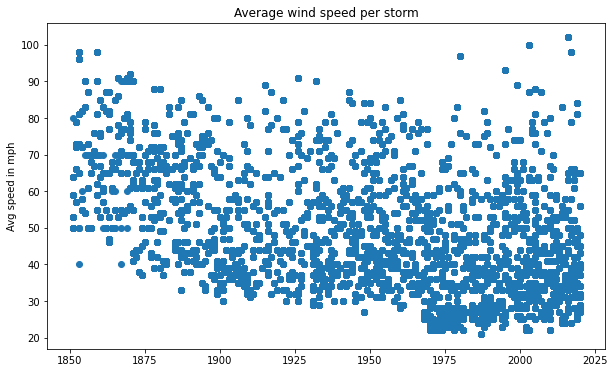

In [130]:
fig4 = plt.figure(figsize=(10,6))
ax4 = fig4.add_subplot()
ax4.scatter(years_ids,windt2)
ax4.set(title='Average wind speed per storm', ylabel='Avg speed in mph')

In [ ]:
# What about if we want to split storms up by type?
# This also takes loads of processor time
ns = []
for i in ids:
    n = df.loc[df['SID'] == i]['NATURE'].unique()
    ns.append(n)
print(ns)

### Workings


In [12]:
# Subset of the array since 1900, using Boolean
year = df.loc[:,'SEASON']
year = np.array(year,dtype=int)
print(year.shape)
print(year > 1900)
print(df[year>1900].shape)

(122369,)
[False False False ...  True  True  True]
(84037, 163)


In [13]:
df.loc[:,'LON'] # for pandas, uses square brackets to get a particular value

1         -90.4000
2         -90.6999
3         -91.0000
4         -91.3001
5         -91.6000
            ...   
122365    -87.1500
122366    -87.3363
122367    -87.5000
122368    -87.6898
122369    -87.9000
Name: LON, Length: 122369, dtype: object